In [3]:
import math
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
%matplotlib inline

In [2]:
# Use this dictionary to map state names to two letter acronyms
states = {'OH': 'Ohio', 'KY': 'Kentucky', 'AS': 'American Samoa', 'NV': 'Nevada', 'WY': 'Wyoming', 'NA': 'National', 'AL': 'Alabama', 'MD': 'Maryland', 'AK': 'Alaska', 'UT': 'Utah', 'OR': 'Oregon', 'MT': 'Montana', 'IL': 'Illinois', 'TN': 'Tennessee', 'DC': 'District of Columbia', 'VT': 'Vermont', 'ID': 'Idaho', 'AR': 'Arkansas', 'ME': 'Maine', 'WA': 'Washington', 'HI': 'Hawaii', 'WI': 'Wisconsin', 'MI': 'Michigan', 'IN': 'Indiana', 'NJ': 'New Jersey', 'AZ': 'Arizona', 'GU': 'Guam', 'MS': 'Mississippi', 'PR': 'Puerto Rico', 'NC': 'North Carolina', 'TX': 'Texas', 'SD': 'South Dakota', 'MP': 'Northern Mariana Islands', 'IA': 'Iowa', 'MO': 'Missouri', 'CT': 'Connecticut', 'WV': 'West Virginia', 'SC': 'South Carolina', 'LA': 'Louisiana', 'KS': 'Kansas', 'NY': 'New York', 'NE': 'Nebraska', 'OK': 'Oklahoma', 'FL': 'Florida', 'CA': 'California', 'CO': 'Colorado', 'PA': 'Pennsylvania', 'DE': 'Delaware', 'NM': 'New Mexico', 'RI': 'Rhode Island', 'MN': 'Minnesota', 'VI': 'Virgin Islands', 'NH': 'New Hampshire', 'MA': 'Massachusetts', 'GA': 'Georgia', 'ND': 'North Dakota', 'VA': 'Virginia'}

In [4]:
# Use this dictionary to map state names to two letter acronyms
states = {'OH': 'Ohio', 'KY': 'Kentucky', 'AS': 'American Samoa', 'NV': 'Nevada', 'WY': 'Wyoming', 'NA': 'National', 'AL': 'Alabama', 'MD': 'Maryland', 'AK': 'Alaska', 'UT': 'Utah', 'OR': 'Oregon', 'MT': 'Montana', 'IL': 'Illinois', 'TN': 'Tennessee', 'DC': 'District of Columbia', 'VT': 'Vermont', 'ID': 'Idaho', 'AR': 'Arkansas', 'ME': 'Maine', 'WA': 'Washington', 'HI': 'Hawaii', 'WI': 'Wisconsin', 'MI': 'Michigan', 'IN': 'Indiana', 'NJ': 'New Jersey', 'AZ': 'Arizona', 'GU': 'Guam', 'MS': 'Mississippi', 'PR': 'Puerto Rico', 'NC': 'North Carolina', 'TX': 'Texas', 'SD': 'South Dakota', 'MP': 'Northern Mariana Islands', 'IA': 'Iowa', 'MO': 'Missouri', 'CT': 'Connecticut', 'WV': 'West Virginia', 'SC': 'South Carolina', 'LA': 'Louisiana', 'KS': 'Kansas', 'NY': 'New York', 'NE': 'Nebraska', 'OK': 'Oklahoma', 'FL': 'Florida', 'CA': 'California', 'CO': 'Colorado', 'PA': 'Pennsylvania', 'DE': 'Delaware', 'NM': 'New Mexico', 'RI': 'Rhode Island', 'MN': 'Minnesota', 'VI': 'Virgin Islands', 'NH': 'New Hampshire', 'MA': 'Massachusetts', 'GA': 'Georgia', 'ND': 'North Dakota', 'VA': 'Virginia'}

def get_list_of_university_towns():
    """
    Returns a DataFrame of towns and the states they are in from the 
    university_towns.txt list. The format of the DataFrame should be:
    DataFrame( [ ["Michigan", "Ann Arbor"], ["Michigan", "Yipsilanti"] ], 
    columns=["State", "RegionName"]  )

    The following cleaning needs to be done:
    1. For "State", removing characters from "[" to the end.
    2. For "RegionName", when applicable, removing every character from " (" to the end.
    3. Depending on how you read the data, you may need to remove newline character '\n'. 
    """
    df = pd.read_table("https://storage.googleapis.com/um_ds_intro/university_towns.txt", header=None)
    df.columns = ['StateRegion']
    df['StateFlag'] = df['StateRegion'].str.contains(pat=r'\[edit\]')
    df_states = df[df['StateFlag'] == True]
    # Find out state name
    States = df_states['StateRegion'].str.replace(pat=r'\[edit\]', repl='').unique()
    StateFlags = df['StateFlag'].values
    j = 0
    StateMatchRegion = [States[j]]
    # Seperate state and region
    for i in range(1, len(StateFlags)):
        if StateFlags[i] == True:
            j += 1
            StateMatchRegion.append(States[j])
        else:
            j += 0
            StateMatchRegion.append(States[j])
    # Clean data
    df['StateMatchRegion'] = StateMatchRegion
    df['RegionName'] = df['StateRegion'].str.replace(pat=r'\s\(.*', repl='')
    ans = df[df['StateFlag'] == False]
    ans = ans.drop(['StateRegion', 'StateFlag'], axis=1)
    ans.columns = ['State', 'RegionName']
    mapping_df = pd.DataFrame({
    "State": list(states.values()),
    "StateAcronyms": list(states.keys())
    })
    ans = pd.merge(ans, mapping_df, how='left')
    return ans

get_list_of_university_towns()

,State,RegionName,StateAcronyms
0,Alabama,Auburn,AL
1,Alabama,Florence,AL
2,Alabama,Jacksonville,AL
3,Alabama,Livingston,AL
4,Alabama,Montevallo,AL
...,...,...,...
512,Wisconsin,River Falls,WI
513,Wisconsin,Stevens Point,WI
514,Wisconsin,Waukesha,WI
515,Wisconsin,Whitewater,WI


In [5]:
 def convert_housing_data_to_quarters(): 
    df = pd.read_csv('https://storage.googleapis.com/um_ds_intro/City_Zhvi_AllHomes.csv')
    df_state_region = df.loc[:, ['State', 'RegionName']]
    # Choose house price latter than 2000-01
    df_housing_price = df.loc[:, '2000-01':]
   
    df_concat = pd.concat([df_state_region, df_housing_price], axis = 1)
    ans = df_concat.set_index(['State', 'RegionName'])
  
    return ans
convert_housing_data_to_quarters()

,,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,...,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08
State,RegionName,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
NY,New York,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,472100,474300,477600,481400,485100,488800,492600,495900,499500,503500,506400,509900,515700,520800,522200,522400,523800,526200,528400,529600,530800,532200,533800,536200,540600,545600,551400,557200,563000,568700,573600,576200,578400,582200,588000,592200,592500,590200,588000,586400
CA,Los Angeles,204400.0,207000.0,209800.0,212300.0,214500.0,216600.0,219000.0,221100.0,222800.0,224300.0,226100.0,228100.0,230600.0,233000.0,235400.0,237300.0,239100.0,240900.0,242900.0,245000.0,247300.0,250100.0,253100.0,255900.0,258800.0,261900.0,265200.0,268600.0,272600.0,276900.0,281800.0,287000.0,292200.0,297000.0,302100.0,307600.0,313400.0,319000.0,324300.0,329600.0,...,432700,440400,448100,455200,461900,467800,472300,475700,479400,484000,489400,494200,498100,501800,505600,509000,512600,516000,518900,521700,525100,528900,532400,535300,538200,541000,544000,547200,550600,554200,558200,560800,562800,565600,569700,574000,577800,580600,583000,585100
IL,Chicago,136800.0,138300.0,140100.0,141900.0,143700.0,145300.0,146700.0,147900.0,149000.0,150400.0,152000.0,154000.0,155600.0,157000.0,158200.0,159900.0,161800.0,163700.0,165300.0,166400.0,167500.0,168800.0,170400.0,172100.0,173900.0,175600.0,177000.0,177800.0,177600.0,177300.0,177700.0,178800.0,180400.0,182300.0,183800.0,185000.0,185600.0,186800.0,188900.0,191300.0,...,172400,175100,178200,181000,183200,184600,185800,187200,189100,191100,192500,192600,192400,192900,193900,195600,197800,200100,201700,202000,201200,200500,201500,204000,206500,207600,207700,208100,209100,209000,207800,206900,206200,205800,206200,207300,208200,209100,211000,213000
PA,Philadelphia,52700.0,53100.0,53200.0,53400.0,53700.0,53800.0,53800.0,54100.0,54500.0,54700.0,54600.0,54800.0,55100.0,55400.0,55500.0,55400.0,55500.0,55700.0,55900.0,56300.0,56600.0,57000.0,57500.0,58100.0,58600.0,59100.0,59700.0,60300.0,60700.0,61200.0,61800.0,62200.0,62500.0,63000.0,63600.0,63900.0,64200.0,64700.0,65300.0,65700.0,...,111800,111200,111000,110900,111100,111800,112700,112900,113100,113900,114200,113600,113500,114100,114900,115500,115500,115400,115600,116000,116100,116100,116400,117000,117900,119000,120100,121300,122300,122700,122300,121600,121800,123300,125200,126400,127000,127400,128300,129100
AZ,Phoenix,111000.0,111700.0,112800.0,113700.0,114300.0,115100.0,115600.0,115900.0,116500.0,117200.0,117400.0,117600.0,118400.0,119700.0,120700.0,121200.0,121500.0,122000.0,122400.0,122700.0,123000.0,123600.0,124300.0,125000.0,125800.0,126600.0,127200.0,127900.0,128400.0,128800.0,129500.0,130500.0,131600.0,132500.0,133200.0,134000.0,134900.0,135700.0,136500.0,137200.0,...,144700,147400,150500,153600,156100,158100,160000,161600,162700,163300,163700,164100,164200,164500,164700,165200,166200,167200,168400,169900,171000,171500,172100,172900,174100,175500,177100,179100,181000,182400,183800,185300,186600,188000,189100,190200,191300,192800,194500,195900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [6]:
housing_data_quarters = convert_housing_data_to_quarters()
quarters = housing_data_quarters.columns
new_data = housing_data_quarters.reset_index()

# Choose university town
university_towns = get_list_of_university_towns().drop('State', axis=1)
new_data = pd.merge(new_data, university_towns, how='left', left_on = ['State', 'RegionName'], right_on = ['StateAcronyms', 'RegionName'])
new_data = new_data.assign(is_university_town = [True if isinstance(x, str) else False for x in new_data['StateAcronyms'].values])
new_data = new_data.drop('StateAcronyms', axis=1)

In [7]:
# Calculate the averange housing price of university town
Is_uni_town = new_data[new_data['is_university_town'] == True].mean()
Is_uni = pd.Series(Is_uni_town)
Is_uni = Is_uni.reset_index()
Is_uni.columns = ['Quarter', 'Mean']

# Calculate the averange housing price of none university town
Not_uni_town = new_data[new_data['is_university_town'] == False].mean()
Not_uni = pd.Series(Not_uni_town)
Not_uni = Not_uni.reset_index()
Not_uni.columns = ['Quarter', 'Mean']
Is_uni = Is_uni.loc[0:191, :]
Not_uni = Not_uni.loc[0:191, :]
Is_uni

,Quarter,Mean
0,2000-01,128306.504065
1,2000-02,129459.109312
2,2000-03,130508.097166
3,2000-04,131488.663968
4,2000-05,132466.396761
...,...,...
187,2015-08,212584.758364
188,2015-09,213493.308550
189,2015-10,214362.825279
190,2015-11,215315.241636


In [9]:
#Change index to annaul
year_means = []
for y in range(0, 192, 12):
    df_subset = Not_uni.iloc[y:y+11, 1]
    year_mean = df_subset.mean()
    year_means.append(year_mean)
year = np.arange(2000, 2016, 1) 
Not_uni_df = pd.DataFrame(year_means)
Not_uni_df = Not_uni_df.set_index(year)

#Change index to annaul
Uni_year_means = []
for y in range(0, 192, 12):
    df_subset = Is_uni.iloc[y:y+11, 1]
    year_mean = df_subset.mean()
    Uni_year_means.append(year_mean)
year = np.arange(2000, 2016, 1) 
Is_uni_df = pd.DataFrame(Uni_year_means)
Is_uni_df = Is_uni_df.set_index(year)
Is_uni_df

,0
2000,133500.370447
2001,144611.466575
2002,155152.712610
2003,168429.216004
2004,186243.713477
2005,207462.656613
2006,220723.629289
2007,219843.296781
2008,208365.602318
2009,196105.078315


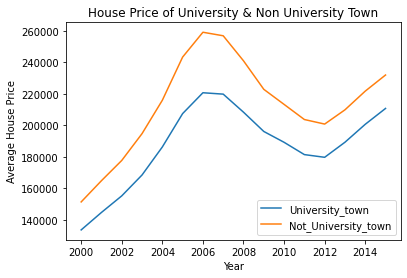

In [10]:
#Plot the housing price correlation chart between university and none university town
fig = plt.figure()
ax = plt.axes()

ax.plot(Is_uni_df[0], label = 'University_town')
ax.plot(Not_uni_df[0], label = 'Not_University_town')

ax.legend(loc = 'lower right')
ax.set_title('House Price of University & Non University Town')
ax.set_ylabel('Average House Price')
ax.set_xlabel('Year')

plt.show()